# CPSC 483-01 Project 7 Clustering and Customer Segmentation 5/20/2021
   ## Student Name: Fulya Kocaman
   ## Student ID: 803023878
   
 ## Project 7 Description:

In this project I compared the results of using clustering algorithms to segment customers based on their purchasing data. The dataset used for this project was spending.csv that consists of weekly spending by families on several common grocery items. Spending is listed in units of dollars per week.In addition to the libraries I have used in previous projects, I used SciPy to plot dendrograms.

I implemented all of the required parts of this project and answered all of the experiment questions in the markdown cells of my code below. As a conclusion, I can say that my code seems to be working fine and predicting accurate results to the given experiment questions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

## Experiment 1: 
Use read_csv() to load and examine the spending.csv dataset.

In [2]:
df = pd.read_csv('spending.csv')
df_original = df
df_original

,apples,bananas,beer,bread,broccoli,diapers,eggs,milk,potatoes,steak
0,0,0,0,0,13,0,16,8,0,17
1,11,12,7,9,0,26,7,6,5,2
2,14,13,6,12,0,30,8,6,4,2
3,0,0,17,1,0,0,0,0,3,22
4,0,0,45,1,0,0,0,0,5,27
...,...,...,...,...,...,...,...,...,...,...
283,8,10,0,0,16,0,0,0,8,0
284,0,0,0,0,14,0,12,7,0,16
285,0,0,23,0,0,0,0,0,4,17
286,3,14,0,0,20,0,0,0,8,0


In [3]:
df_original.describe()

,apples,bananas,beer,bread,broccoli,diapers,eggs,milk,potatoes,steak
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,3.604167,3.392361,8.888889,2.913194,6.972222,5.336806,6.250000,2.868056,3.947917,14.975694
std,5.031910,4.778969,13.191229,4.928347,6.689161,11.612850,6.712098,3.481652,3.821003,12.339680
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,8.500000,0.000000,4.000000,0.000000,3.000000,18.000000
75%,8.000000,8.000000,12.000000,4.000000,13.000000,0.000000,13.000000,6.000000,7.000000,25.000000
max,18.000000,17.000000,50.000000,20.000000,22.000000,44.000000,20.000000,12.000000,15.000000,45.000000


## Experiment 2: 
Use sklearn.cluster.KMeans to cluster the dataset using the default parameters. Assign the labels_ attribute determined by the algorithm to a new column in your DataFrame. How many clusters are there?

In [4]:
kmeans = KMeans().fit(df)

df['labels_'] = kmeans.labels_
df

,apples,bananas,beer,bread,broccoli,diapers,eggs,milk,potatoes,steak,labels_
0,0,0,0,0,13,0,16,8,0,17,2
1,11,12,7,9,0,26,7,6,5,2,7
2,14,13,6,12,0,30,8,6,4,2,3
3,0,0,17,1,0,0,0,0,3,22,4
4,0,0,45,1,0,0,0,0,5,27,6
...,...,...,...,...,...,...,...,...,...,...,...
283,8,10,0,0,16,0,0,0,8,0,0
284,0,0,0,0,14,0,12,7,0,16,2
285,0,0,23,0,0,0,0,0,4,17,1
286,3,14,0,0,20,0,0,0,8,0,0


In [5]:
kmeans.labels_

array([2, 7, 3, 4, 6, 1, 2, 0, 6, 3, 1, 5, 0, 6, 4, 5, 5, 2, 1, 0, 1, 0,
       3, 7, 0, 1, 7, 0, 6, 1, 2, 2, 0, 5, 0, 5, 6, 3, 5, 0, 1, 5, 1, 4,
       1, 0, 5, 3, 0, 2, 5, 0, 0, 4, 0, 0, 0, 7, 6, 2, 5, 2, 2, 2, 2, 5,
       0, 5, 2, 1, 6, 5, 5, 2, 0, 0, 6, 7, 5, 5, 1, 6, 4, 3, 3, 5, 2, 6,
       4, 6, 4, 3, 3, 3, 0, 5, 5, 5, 5, 5, 2, 0, 3, 1, 0, 3, 7, 5, 1, 1,
       5, 5, 5, 2, 5, 6, 1, 2, 0, 2, 0, 4, 0, 0, 6, 1, 4, 3, 2, 3, 2, 0,
       3, 7, 1, 5, 5, 2, 4, 2, 2, 0, 2, 1, 0, 0, 0, 5, 2, 7, 0, 0, 0, 2,
       0, 5, 1, 3, 6, 3, 3, 5, 7, 5, 0, 2, 2, 0, 5, 2, 7, 0, 6, 0, 0, 5,
       3, 6, 1, 5, 5, 0, 0, 0, 3, 3, 6, 4, 4, 3, 7, 5, 4, 1, 3, 3, 5, 5,
       3, 0, 1, 6, 2, 1, 1, 0, 0, 1, 0, 6, 1, 1, 1, 2, 2, 7, 3, 2, 0, 1,
       5, 2, 2, 5, 2, 1, 0, 5, 6, 2, 6, 2, 3, 3, 7, 3, 2, 5, 4, 1, 0, 3,
       1, 6, 3, 3, 3, 0, 2, 0, 0, 0, 3, 5, 2, 0, 2, 4, 5, 2, 0, 1, 7, 6,
       6, 5, 5, 3, 5, 1, 0, 6, 5, 2, 3, 2, 3, 0, 3, 0, 2, 0, 5, 0, 2, 1,
       0, 5])

## The result of Experiment 2: 

There are 8 clusters labeled from 0 to 7.

## Experiment 3: 

Use pandas.DataFrame.groupby() to group the data by cluster assignment, then use the GroupBy object to examine descriptive statistics such as minimum, maximum, and mean. Describe any differences you see between the clusters.
Caution: don’t include the cluster number that you added in the previous experiment as one of the features to be clustered in later steps, or it will skew your results


In [6]:
df_by_labels = df_original.groupby(['labels_'])

In [7]:
df_by_labels.describe()

apples                                                     bananas  \
         count       mean       std  min    25%   50%    75%   max   count   
labels_                                                                      
0         62.0   7.064516  3.125102  1.0   4.00   6.5  10.00  14.0    62.0   
1         35.0   0.000000  0.000000  0.0   0.00   0.0   0.00   0.0    35.0   
2         47.0   0.000000  0.000000  0.0   0.00   0.0   0.00   0.0    47.0   
3         38.0  10.973684  2.562588  6.0   9.00  11.0  13.00  16.0    38.0   
4         15.0   0.000000  0.000000  0.0   0.00   0.0   0.00   0.0    15.0   
5         52.0   0.000000  0.000000  0.0   0.00   0.0   0.00   0.0    52.0   
6         25.0   0.000000  0.000000  0.0   0.00   0.0   0.00   0.0    25.0   
7         14.0  13.071429  2.867974  8.0  11.25  12.5  14.75  18.0    14.0   

                    ... potatoes       steak                                   \
              mean  ...      75%   max count       mean       std   min   25%   
labels_             ...                                                         
0         7.435484  ...    11.00  15.0  62.0   0.000000  0.000000   0.0   0.0   
1         0.000000  ...     6.00   8.0  35.0  28.400000  4.131657  17.0  26.0   
2         0.000000  ...     0.00   0.0  47.0  16.063830  3.226280   8.0  14.5   
3         9.657895  ...     5.00  10.0  38.0   2.578947  1.883521   0.0   1.0   
4         0.000000  ...     5.00   8.0  15.0  28.400000  6.533431  20.0  23.5   
5         0.000000  ...     0.00   0.0  52.0  23.711538  2.724878  19.0  22.0   
6         0.000000  ...     5.00   8.0  25.0  30.560000  5.300000  23.0  25.0   
7        10.642857  ...     4.75   8.0  14.0   3.071429  1.384768   1.0   2.0   

                            
          50%    75%   max  
labels_                     
0         0.0   0.00   0.0  
1        29.0  30.50  38.0  
2        17.0  19.00  20.0  
3         2.0   4.00   6.0  
4        29.0  31.50  45.0  
5        23.0  25.25  33.0  
6        32.0  33.00  44.0  
7         3.0   4.00   6.0  

[8 rows x 80 columns]

In [8]:
df.groupby(['labels_']).min()

,apples,bananas,beer,bread,broccoli,diapers,eggs,milk,potatoes,steak
labels_,,,,,,,,,,
0,1,0,0,0,8,0,0,0,5,0
1,0,0,21,0,0,0,0,0,1,17
2,0,0,0,0,4,0,10,0,0,8
3,6,5,4,5,0,26,0,5,1,0
4,0,0,0,0,0,0,0,0,2,20
5,0,0,0,0,3,0,10,0,0,19
6,0,0,33,0,0,0,0,0,0,23
7,8,7,5,7,0,17,2,4,1,1


In [9]:
df.groupby(['labels_']).max()

,apples,bananas,beer,bread,broccoli,diapers,eggs,milk,potatoes,steak
labels_,,,,,,,,,,
0,14,17,0,0,22,0,0,0,15,0
1,0,0,34,6,0,0,0,0,8,38
2,0,0,0,0,16,0,18,9,0,20
3,16,16,12,20,0,44,12,12,10,6
4,0,0,20,4,0,0,0,0,8,45
5,0,0,0,0,18,0,20,12,0,33
6,0,0,50,8,0,0,0,0,8,44
7,18,13,12,16,0,28,15,9,8,6


In [10]:
df.groupby(['labels_']).mean()

,apples,bananas,beer,bread,broccoli,diapers,eggs,milk,potatoes,steak
labels_,,,,,,,,,,
0,7.064516,7.435484,0.000000,0.000000,14.661290,0.000000,0.000000,0.000000,9.532258,0.000000
1,0.000000,0.000000,27.971429,2.571429,0.000000,0.000000,0.000000,0.000000,4.800000,28.400000
2,0.000000,0.000000,0.000000,0.000000,10.361702,0.000000,14.276596,4.106383,0.000000,16.063830
3,10.973684,9.657895,7.947368,12.947368,0.000000,31.921053,7.000000,7.842105,4.315789,2.578947
4,0.000000,0.000000,13.466667,1.733333,0.000000,0.000000,0.000000,0.000000,3.733333,28.400000
5,0.000000,0.000000,0.000000,0.000000,11.769231,0.000000,14.692308,4.519231,0.000000,23.711538
6,0.000000,0.000000,38.960000,2.840000,0.000000,0.000000,0.000000,0.000000,4.360000,30.560000
7,13.071429,10.642857,7.357143,11.428571,0.000000,23.142857,7.071429,7.142857,3.500000,3.071429


## The result of Experiment 3: 

Cluster numbers 0 and 7 don't spend money on veggies like broccoli and steak whereas they spend the most money on diapers, milk, bread and fruits like apples and bananas which mean they are most likely the families with little kids. Cluster numbers 2, 4, and 6 like to spend more money on beer, steak, and potatoes, cluster numbers 1 and 5 have similarities of buying eggs, milk, steak, and broccoli whereas cluster number 3 spends the most money on broccoli, potatoes and some on fruits, but not milk or eggs, probably vegan choice.    

## Experiment 4: 

Plot a scipy.cluster.hierarchy.dendrogram() for the dataset using each of the types of linkage described in Table 10.2 of An Introduction to Statistical Learning.
Based on the dendrogram, how many clusters appear to be present in the dataset? You may need to plot several dendrograms before the answer becomes clear.
Caution: SciPy sets the colors for dendrograms using a default threshold. This may not correspond to the best location for a cut with your particular dataset.

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

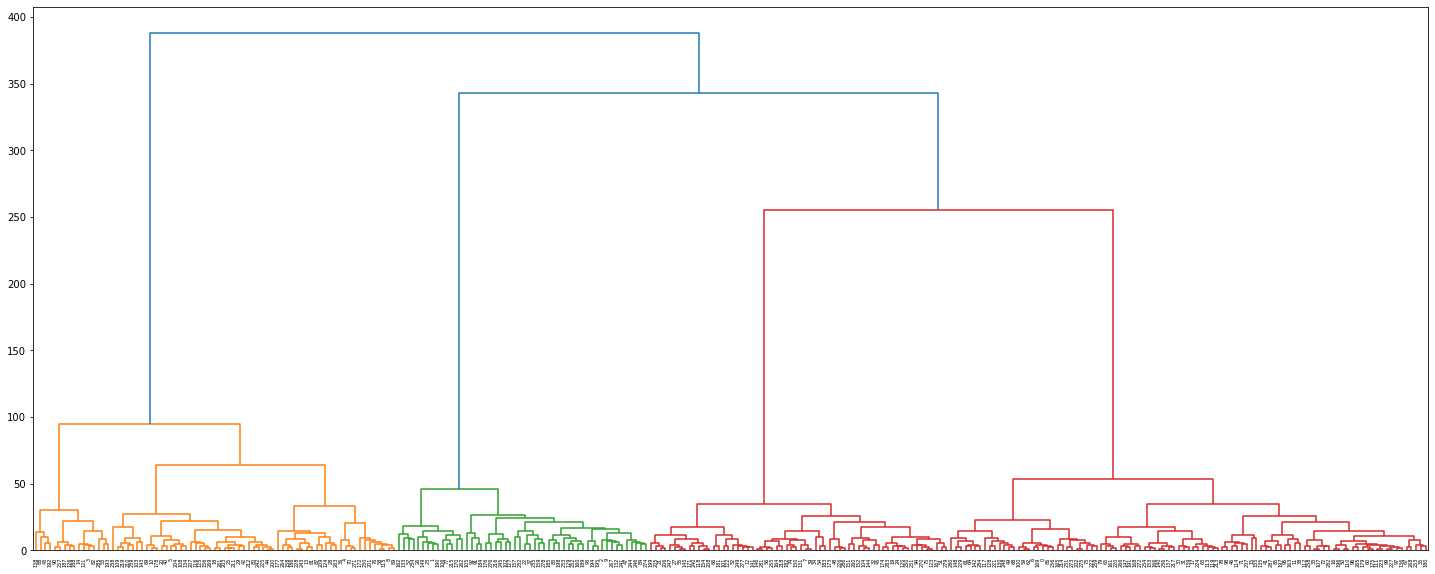

In [12]:
Z = linkage(df_original, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

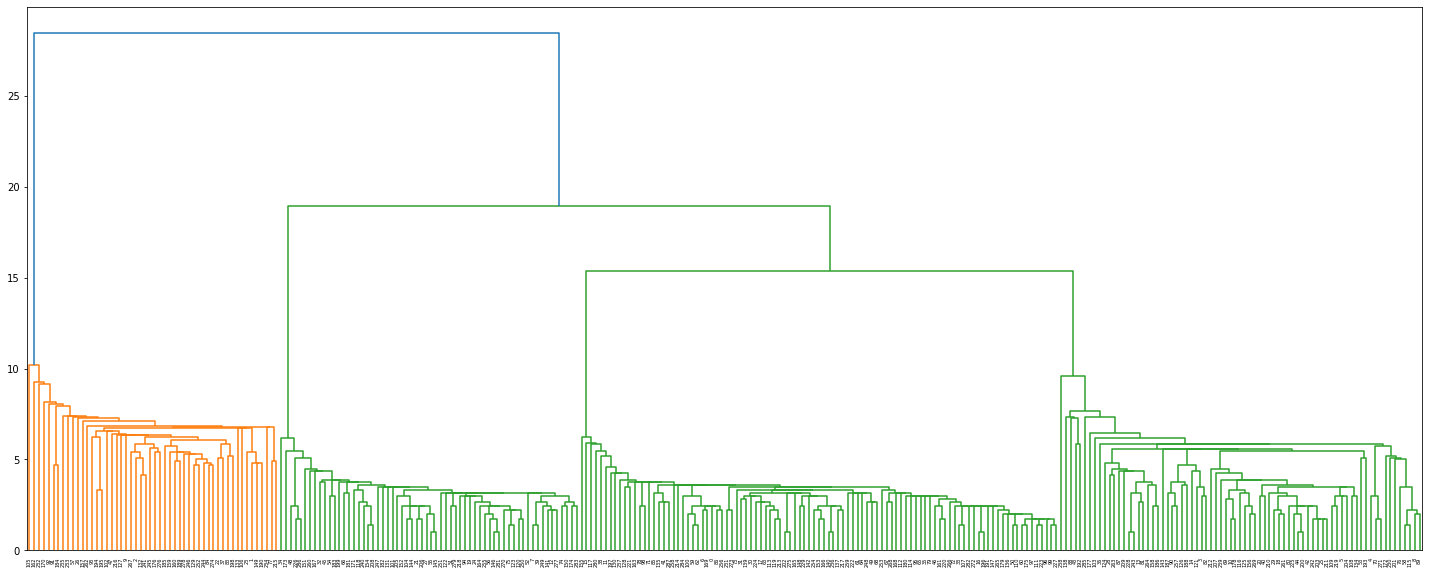

In [13]:
Z = linkage(df_original, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

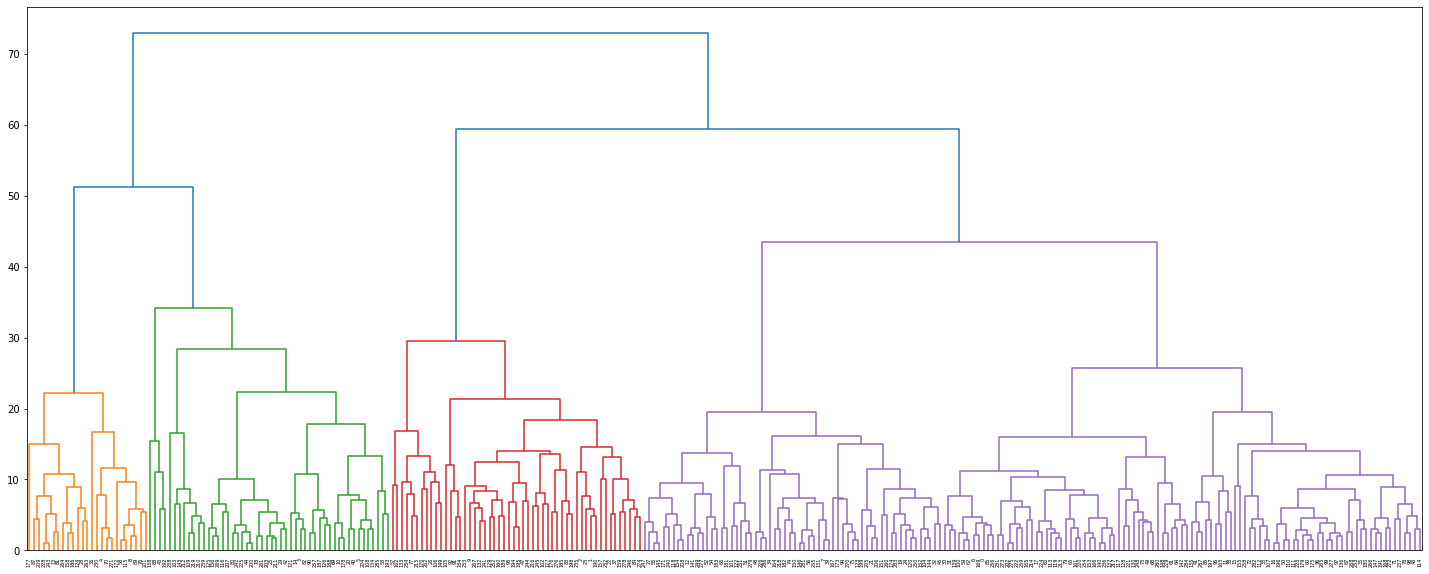

In [14]:
Z = linkage(df_original, 'complete')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

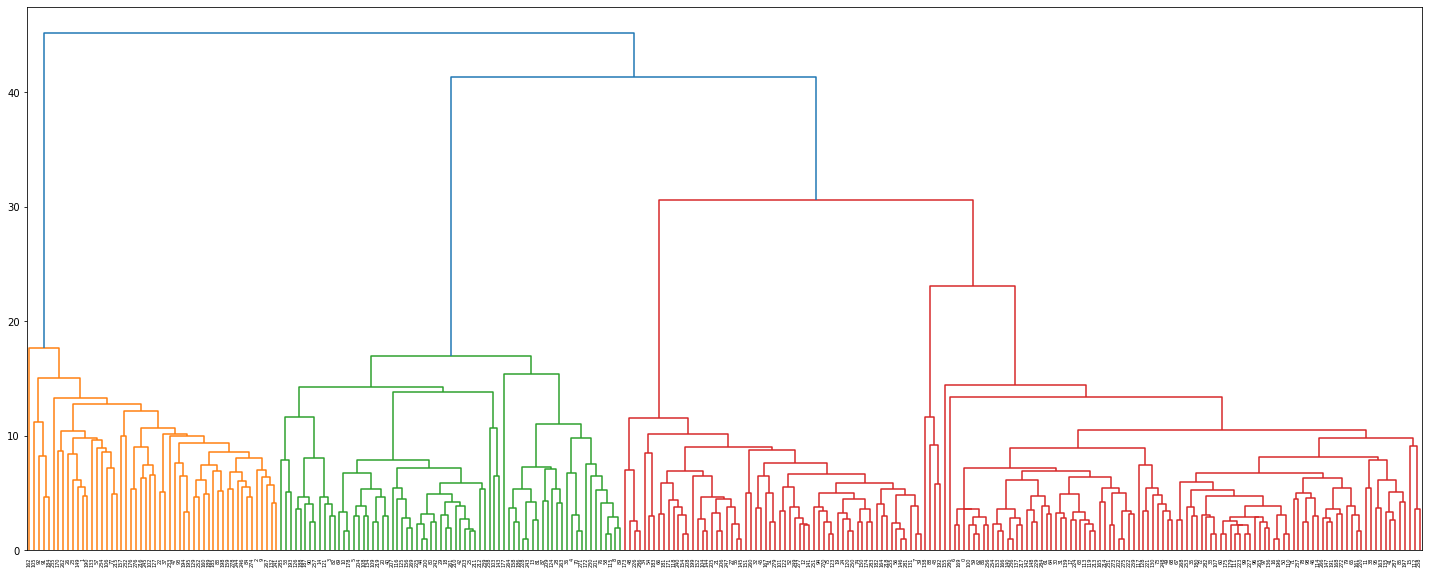

In [15]:
Z = linkage(df_original, 'average')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

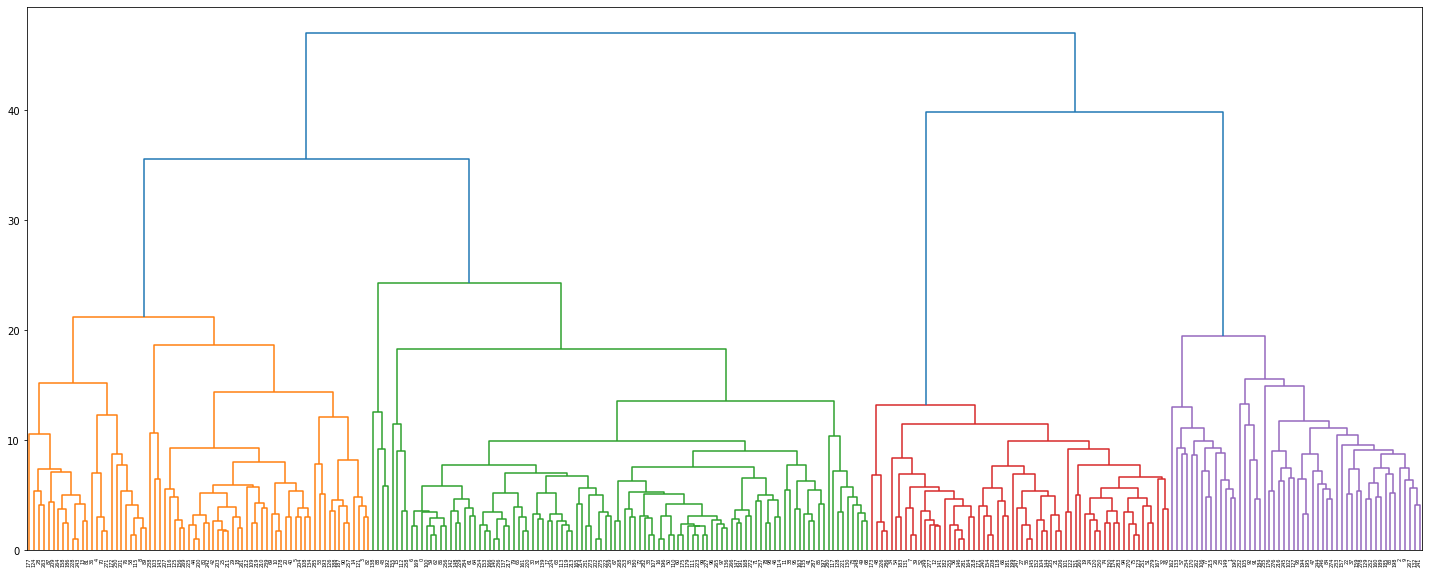

In [16]:
Z = linkage(df_original, 'weighted')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

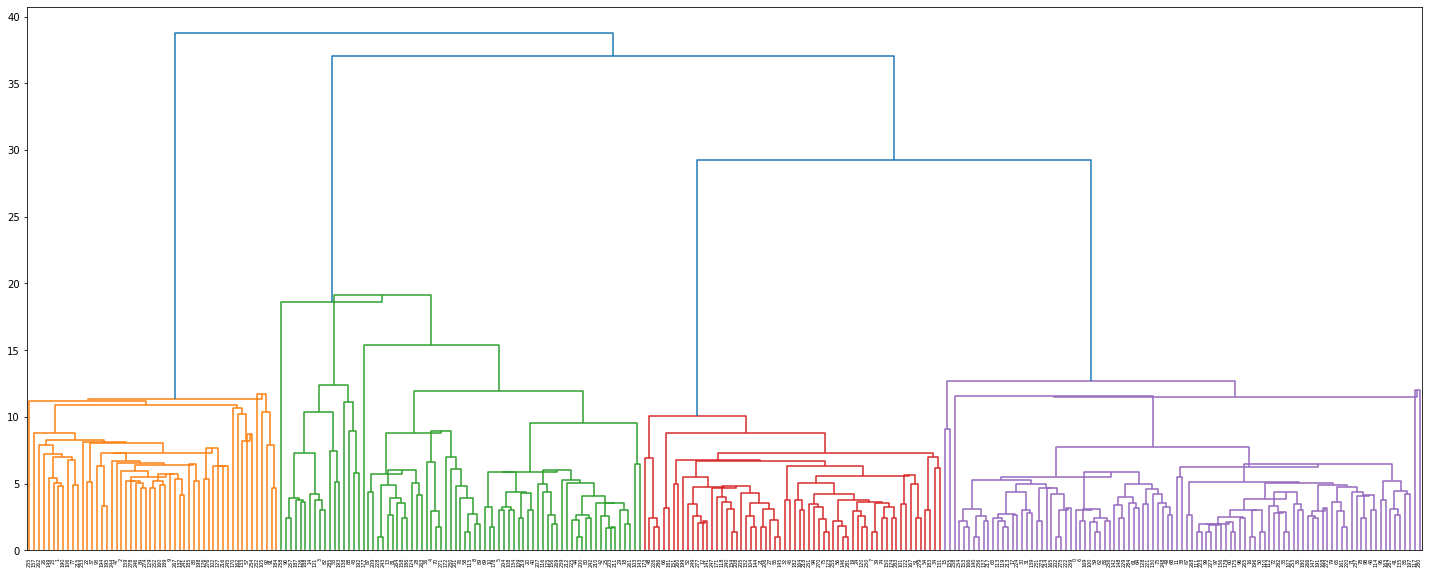

In [17]:
Z = linkage(df_original, 'centroid')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

## The result of Experiment 4: 

Based on the several dendrogram, it appears to have 4 clusters to be present in the dataset.

## Experiment 5: 

Repeat the experiment (2) using 4 clusters I determined to be present in experiment (4). 

In [18]:
df2 = df_original
kmeans = KMeans(n_clusters=4, random_state=0).fit(df2)

In [19]:
df2['labels_'] = kmeans.labels_

## Experiment 6: 

Now switch to sklearn.cluster.AgglomerativeClustering() and repeat for the same number of clusters. How do the label assignments compare for the two algorithms?
Caution: once again, don’t include the cluster number determined in the previous experiment as one of the features to be clustered, or it will skew your results.


In [20]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=8).fit(df_original)
clustering.labels_

array([2, 3, 3, 4, 1, 5, 2, 0, 1, 3, 5, 6, 0, 1, 4, 6, 6, 2, 5, 0, 5, 0,
       7, 3, 0, 5, 3, 0, 1, 5, 2, 2, 0, 6, 0, 6, 1, 7, 6, 0, 5, 6, 5, 4,
       5, 0, 6, 3, 0, 2, 6, 0, 0, 4, 0, 0, 0, 3, 1, 2, 6, 2, 2, 2, 2, 2,
       0, 2, 2, 5, 1, 6, 6, 2, 0, 0, 1, 3, 6, 2, 5, 1, 4, 7, 7, 6, 2, 1,
       4, 1, 4, 7, 7, 3, 0, 6, 6, 6, 6, 6, 2, 0, 7, 5, 0, 7, 3, 6, 5, 5,
       6, 6, 6, 2, 6, 1, 5, 2, 0, 2, 0, 4, 0, 0, 1, 5, 4, 7, 2, 7, 2, 0,
       3, 3, 5, 6, 6, 2, 4, 2, 2, 0, 2, 5, 0, 0, 0, 6, 2, 3, 0, 0, 0, 2,
       0, 6, 5, 3, 5, 7, 7, 2, 3, 6, 0, 2, 2, 0, 6, 2, 3, 0, 1, 0, 0, 6,
       7, 1, 5, 6, 6, 0, 0, 0, 7, 7, 5, 4, 4, 7, 3, 6, 4, 4, 3, 3, 6, 6,
       7, 0, 5, 1, 2, 5, 5, 0, 0, 5, 0, 1, 5, 5, 5, 2, 2, 3, 7, 2, 0, 5,
       2, 2, 2, 6, 2, 5, 0, 6, 1, 2, 1, 2, 7, 7, 3, 3, 2, 6, 5, 5, 0, 3,
       5, 1, 7, 7, 7, 0, 2, 0, 0, 0, 7, 6, 2, 0, 2, 4, 6, 2, 0, 5, 3, 1,
       5, 6, 6, 3, 2, 5, 0, 1, 6, 2, 7, 2, 7, 0, 7, 0, 2, 0, 6, 0, 2, 4,
       0, 6], dtype=int64)

In [21]:
clustering = AgglomerativeClustering(n_clusters=4).fit(df_original)
clustering.labels_

array([1, 2, 2, 0, 0, 0, 1, 3, 0, 2, 0, 1, 3, 0, 0, 1, 1, 1, 0, 3, 0, 3,
       2, 2, 3, 0, 2, 3, 0, 0, 1, 1, 3, 1, 3, 1, 0, 2, 1, 3, 0, 1, 0, 0,
       0, 3, 1, 2, 3, 1, 1, 3, 3, 0, 3, 3, 3, 2, 0, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 0, 0, 1, 1, 1, 3, 3, 0, 2, 1, 1, 0, 0, 0, 2, 2, 1, 1, 0,
       0, 0, 0, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 3, 2, 0, 3, 2, 2, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 3, 1, 3, 0, 3, 3, 0, 0, 0, 2, 1, 2, 1, 3,
       2, 2, 0, 1, 1, 1, 0, 1, 1, 3, 1, 0, 3, 3, 3, 1, 1, 2, 3, 3, 3, 1,
       3, 1, 0, 2, 0, 2, 2, 1, 2, 1, 3, 1, 1, 3, 1, 1, 2, 3, 0, 3, 3, 1,
       2, 0, 0, 1, 1, 3, 3, 3, 2, 2, 0, 0, 0, 2, 2, 1, 0, 0, 2, 2, 1, 1,
       2, 3, 0, 0, 1, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 1, 1, 2, 2, 1, 3, 0,
       1, 1, 1, 1, 1, 0, 3, 1, 0, 1, 0, 1, 2, 2, 2, 2, 1, 1, 0, 0, 3, 2,
       0, 0, 2, 2, 2, 3, 1, 3, 3, 3, 2, 1, 1, 3, 1, 0, 1, 1, 3, 0, 2, 0,
       0, 1, 1, 2, 1, 0, 3, 0, 1, 1, 2, 1, 2, 3, 2, 3, 1, 3, 1, 3, 1, 0,
       3, 1], dtype=int64)

## The result of Experiment 6: 

The below is how the algorithm with 4 clusters combines clusters from the algorithm with 8 clusters:

  Clusters 1, 4, and 5 from the algorithm with 8 clusters make up the cluster number 0
  
  Clusters 2, and 6 from the algorithm with 8 clusters make up cluster number 1
  
  Clusters 3, and 7 from the algorithm with 8 clusters make up the cluster number 2
  
  Cluster 0 from the algorithm with 8 clusters makes up the cluster number 3

## Experiment 7: 

Repeat experiment (3) with the clusters you obtained in experiment (5). How would you describe the various types of customers? What can you determine about them based on the data?

In [22]:
df_by_labels2 = df2.groupby(['labels_'])

df_by_labels2.describe()

apples                                                   bananas  \
         count       mean       std  min   25%   50%   75%   max   count   
labels_                                                                    
0         73.0   0.000000  0.000000  0.0   0.0   0.0   0.0   0.0    73.0   
1        101.0   0.000000  0.000000  0.0   0.0   0.0   0.0   0.0   101.0   
2         52.0  11.538462  2.782731  6.0  10.0  12.0  13.0  18.0    52.0   
3         62.0   7.064516  3.125102  1.0   4.0   6.5  10.0  14.0    62.0   

                   ... potatoes        steak                             \
             mean  ...      75%   max  count       mean       std   min   
labels_            ...                                                    
0        0.000000  ...      6.0   8.0   73.0  29.287671  5.070282  17.0   
1        0.000000  ...      0.0   5.0  101.0  20.138614  4.816699   8.0   
2        9.923077  ...      5.0  10.0   52.0   2.711538  1.763870   0.0   
3        7.435484  ...     11.0  15.0   62.0   0.000000  0.000000   0.0   

                                  
           25%   50%   75%   max  
labels_                           
0        25.00  29.0  32.0  45.0  
1        17.00  21.0  23.0  33.0  
2         1.75   2.5   4.0   6.0  
3         0.00   0.0   0.0   0.0  

[4 rows x 80 columns]

In [23]:
df_by_labels2.min()

,apples,bananas,beer,bread,broccoli,diapers,eggs,milk,potatoes,steak
labels_,,,,,,,,,,
0,0,0,6,0,0,0,0,0,0,17
1,0,0,0,0,0,0,0,0,0,8
2,6,5,4,5,0,17,0,4,1,0
3,1,0,0,0,8,0,0,0,5,0


In [24]:
df_by_labels2.max()

,apples,bananas,beer,bread,broccoli,diapers,eggs,milk,potatoes,steak
labels_,,,,,,,,,,
0,0,0,50,8,0,0,0,0,8,45
1,0,0,6,3,18,0,20,12,5,33
2,18,16,12,20,0,44,15,12,10,6
3,14,17,0,0,22,0,0,0,15,0


In [25]:
df_by_labels2.mean()

,apples,bananas,beer,bread,broccoli,diapers,eggs,milk,potatoes,steak
labels_,,,,,,,,,,
0,0.000000,0.000000,29.438356,2.506849,0.000000,0.000000,0.000000,0.000000,4.465753,29.287671
1,0.000000,0.000000,0.059406,0.039604,10.881188,0.000000,14.207921,4.237624,0.069307,20.138614
2,11.538462,9.923077,7.788462,12.538462,0.000000,29.557692,7.019231,7.653846,4.096154,2.711538
3,7.064516,7.435484,0.000000,0.000000,14.661290,0.000000,0.000000,0.000000,9.532258,0.000000


## The result of Experiment 7: 

Cluster number 0 likes to spend the most money on beer and steak, and some on bread and potatoes which means that customers are high likely to be middle-aged single men.

Cluster number 1 spend the most money on buying eggs and moderately on milk, steak, and broccoli which means that customers high likely to be couples or single women.

Cluster number 2 does not spend money on broccoli and steak whereas they spend the most money on diapers, milk, bread and fruits like apples and bananas which mean they are most likely the families with little kids. 

Cluster number 3 spends the most money on broccoli, potatoes and some on fruits, but not milk, eggs, or steak, which means that customers are high likely to be vegan.

## The result of Experiment 8: 

Cluster number 0 would likely purchase other alcoholic beverages, more meat products like burgers and chicken, also some snacks like potatoe chips, nuts and sweets. On the other hand, they would not likely purchase kids related products like diapers and wipes.

Cluster number 1 would likely purchase other meat products like burgers, chicken maybe some fish, also different kinds of veggies and yogurt. On the other hand, they would not likely purchase kids related products like diapers and wipes.

Cluster number 2 would likely purchase cleaning wipes, various kinds of snacks and chicken nuggets. On the other hand, they would not likely purchase different kids of veggies like broccoli.

Cluster number 3 would likely purchase different kids of veggies and fruits like kale, lettuce and berrries, nuts, and legumes for protein. On the other hand, they would not likely purchase steak, eggs, dairy products. 